# Machine Learning Pipeline and Results

- I implemented a class with OOP with Python to use this Machine Learning Pipeline and results visualization for each of the classifier I used:
    - Random Forest
    - XGBoost
    - CatBoost
    - Logistic Regression
- Training and Evaluating each model:
    1. Without Oversampling techniques
    2. With Oversampling techniques:
        * ADASYN
        * SMOTE
        * KMeansSMOTE
- Results without SMOTE:
    1. With default parameters for classifier, I got typical results with imbalanced issue (perfect training results and very low with test)
    2. Reducing the max_depth (greater values make the model more complex and likely to overfit) I better results, more balanced and stabled between training and test evaluation. Accuracy reached good results (~80% for training and few less for test), but the problem of imbalanced dataset still remains: just see the bad results according to recall (~50% for XGBosst and ~30% for Random Forest) and obviously to f1 score (less than 60% almost everywhere) and balanced accuracy around 70%!! 
    3. Catboost seems not to suffer from imbalanced dataset, accuracy is almost the same (0.82 and 0.80) for training and test, but recall is really low ~0.55 so the model is not that good to identify the correct positive data points. Precision confirms that the model is likely able to predict positive class correctly, but not so good infact here we notice imbalanced issue (f1 score ~60% and balanced accuracy ~70%).
- Results with SMOTE:
    1. Looking at the violin plots, you can see that results are more stable for training and test. I reduced the training performances (avoiding overfitting) and receive quite good results in test evaluation
    2. XGBoost and Logistic Regression accuracies are very satisfying (84% in training and over 77% in test)
    3. with this method I increased the recall metric (the model improved to correctly predict classes) reducing the precision (in our case it is a good result, so the model obtains some false positive for class No churn). Obviously this isn't a great result and I think it could be improved, but thinking of the starting dataset it is a great step!
    4. Balanced accuracy gave the better results (over 75% for test set per each model)

In [1]:
# Import libraries and class

import pandas as pd
import json
import os
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

from src.ml_model import ModelPipeline

In [2]:
# Import dataframe 

df = pd.read_excel("Data/CustomerChurn_Transformed.xlsx", index_col=0)
#df.drop(columns="Unnamed: 0", inplace=True)
df.shape

(7032, 38)

In [3]:
df.head(5)

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.000000,0.115423,0.001275,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.464789,0.385075,0.215867,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.014085,0.354229,0.010310,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.619718,0.239303,0.210241,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.014085,0.521891,0.015330,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [3]:
# Initialize class for machine learning and data viz operations

evaluation_pipeline = ModelPipeline(df, 'Churn')

In [5]:
# Models to performe

evaluation_pipeline.models

{'RandomForest': RandomForestClassifier(max_depth=3, random_state=59),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LogisticRegression': LogisticRegression(max_iter=1000)}

In [8]:
# Import df with also categorical features to use CatBoostClassifier

df_with_categorical = pd.read_excel("Data/CustomerChurn_Cleaned_Cat_and_Num.xlsx", index_col=0)
#le = LabelEncoder()
#df_with_categorical['Churn']=le.fit_transform(df_with_categorical['Churn'])
df_with_categorical.head(5)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Initialize class for machine learning and data viz operations with CatBoostClassifier

cat_model = {'CatBoost' : CatBoostClassifier(random_state=59, verbose=False)}

evaluation_pipeline = ModelPipeline(df_with_categorical, 'Churn', models=cat_model)

evaluation_pipeline.models

{'CatBoost': <catboost.core.CatBoostClassifier at 0x286b0d090>}

## Modelling without handling imbalanced label

In [10]:
# Performing stratified cross-validation

print("Evaluating without handling imbalanced labels:")
evaluation_pipeline.stratified_k_cv(k=10, imbalance_method=None)

Evaluating without handling imbalanced labels:
Fold 1:
Training Model 1 CatBoost...
Fold 2:
Training Model 1 CatBoost...
Fold 3:
Training Model 1 CatBoost...
Fold 4:
Training Model 1 CatBoost...
Fold 5:
Training Model 1 CatBoost...
Fold 6:
Training Model 1 CatBoost...
Fold 7:
Training Model 1 CatBoost...
Fold 8:
Training Model 1 CatBoost...
Fold 9:
Training Model 1 CatBoost...
Fold 10:
Training Model 1 CatBoost...


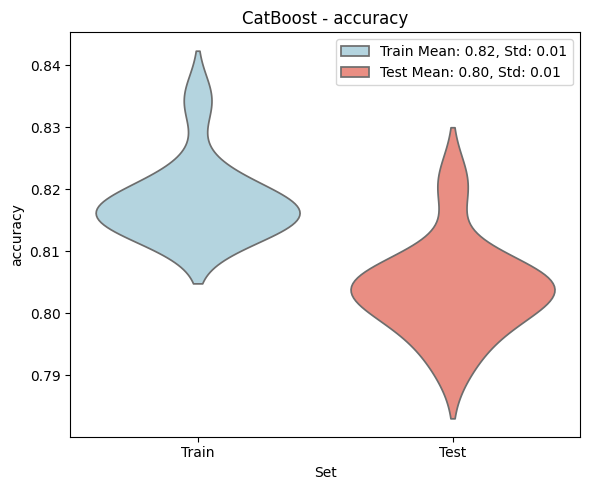

In [11]:
# Visualize results - Accuracy (Bad metric for imbalanced problems)

evaluation_pipeline.results_viz(['accuracy'])

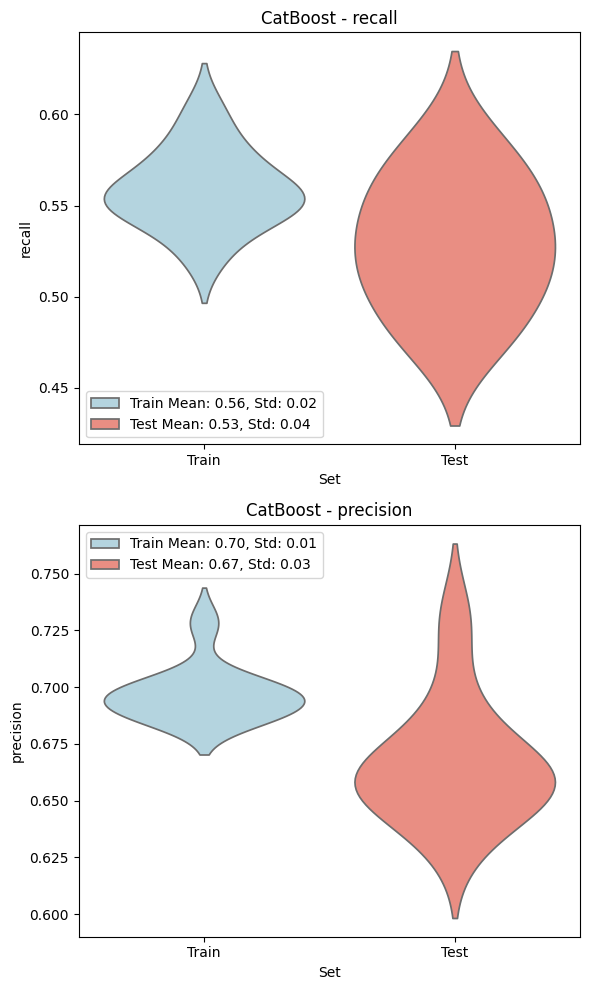

In [12]:
# Visualize results - Recall and Precision

evaluation_pipeline.results_viz(['recall', 'precision'])

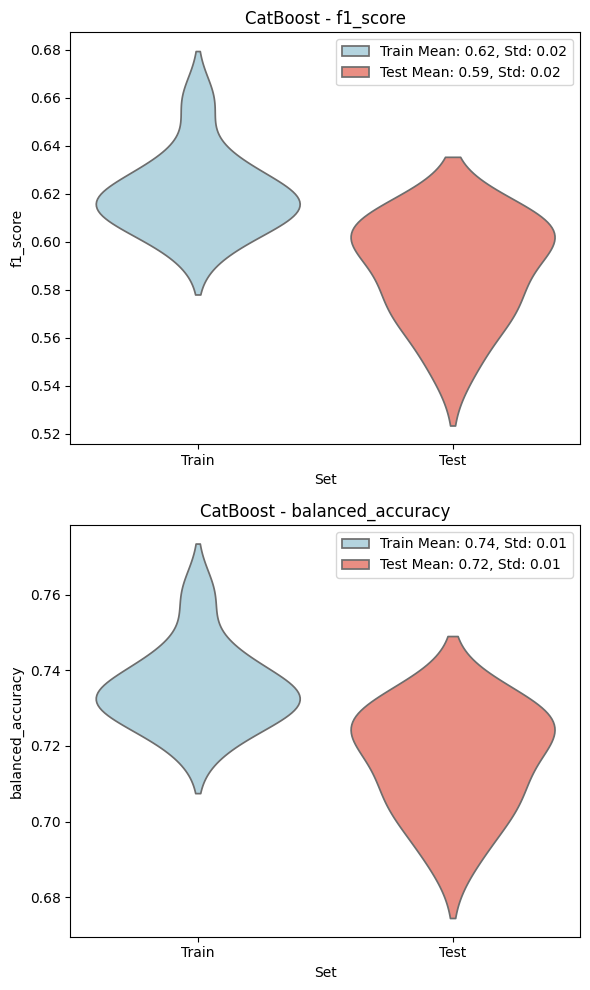

In [13]:
# Visualize results - f1 score and balanced accuracy

evaluation_pipeline.results_viz(['f1_score', 'balanced_accuracy'])

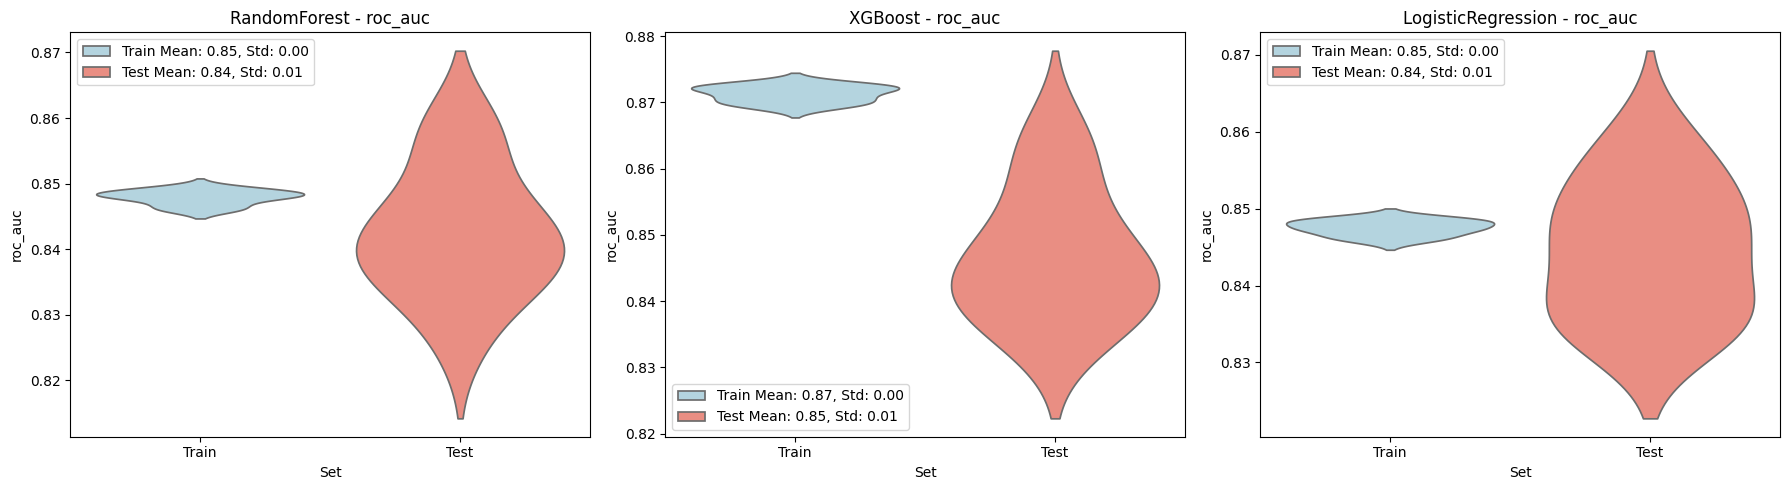

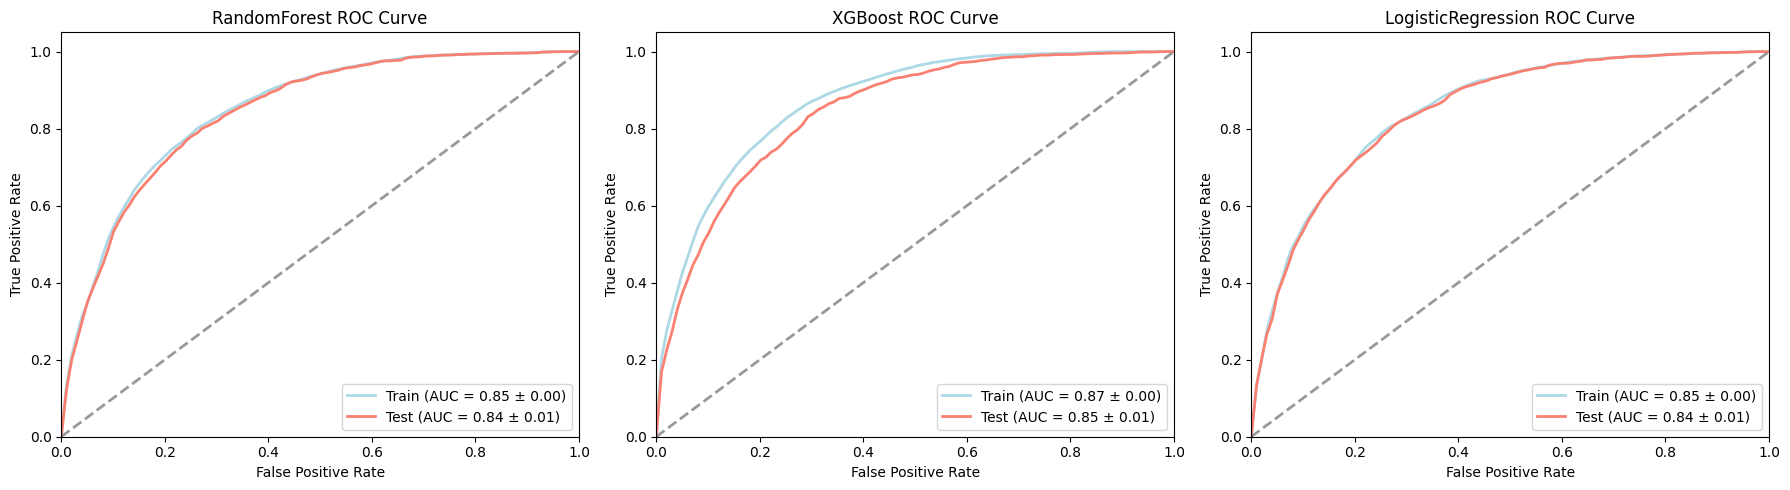

(None, None)

In [9]:
# Visualize results - AUC violin plot and ROC Curve

evaluation_pipeline.results_viz(['roc_auc']), evaluation_pipeline.plot_roc_curve(k = 10)

## Evalutate Models with handling imbalanced label

In [7]:
# SMOTE to handle label imbalanced

print("Evaluating with SMOTE:")
evaluation_pipeline.stratified_k_cv(k=10, imbalance_method='SMOTE')

Evaluating with SMOTE:
Fold 1:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with SMOTE...
Fold 2:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with SMOTE...
Fold 3:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with SMOTE...
Fold 4:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with SMOTE...
Fold 5:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with SMOTE...
Fold 6:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with SMOTE...
Fold 7:
Training Model 1 RandomForest with SMOTE...
Training Model 2 XGBoost with SMOTE...
Training Model 3 LogisticRegression with

In [7]:
# Saving results with using imbalanced technique
# On Mac, I had a issue when continuing the analysis without saving results, restarting kernel and then seeign the results
    # This issue was not present on Google Colab, so I decided to leave this option in case of possible issue with other pc

path = 'Results'
if not os.path.exists(path):
    os.makedirs(path)
path_file = path + '/results_imbalanced_SMOTE.json'
with open(path_file, 'w') as f:
    json.dump(evaluation_pipeline.results, f)

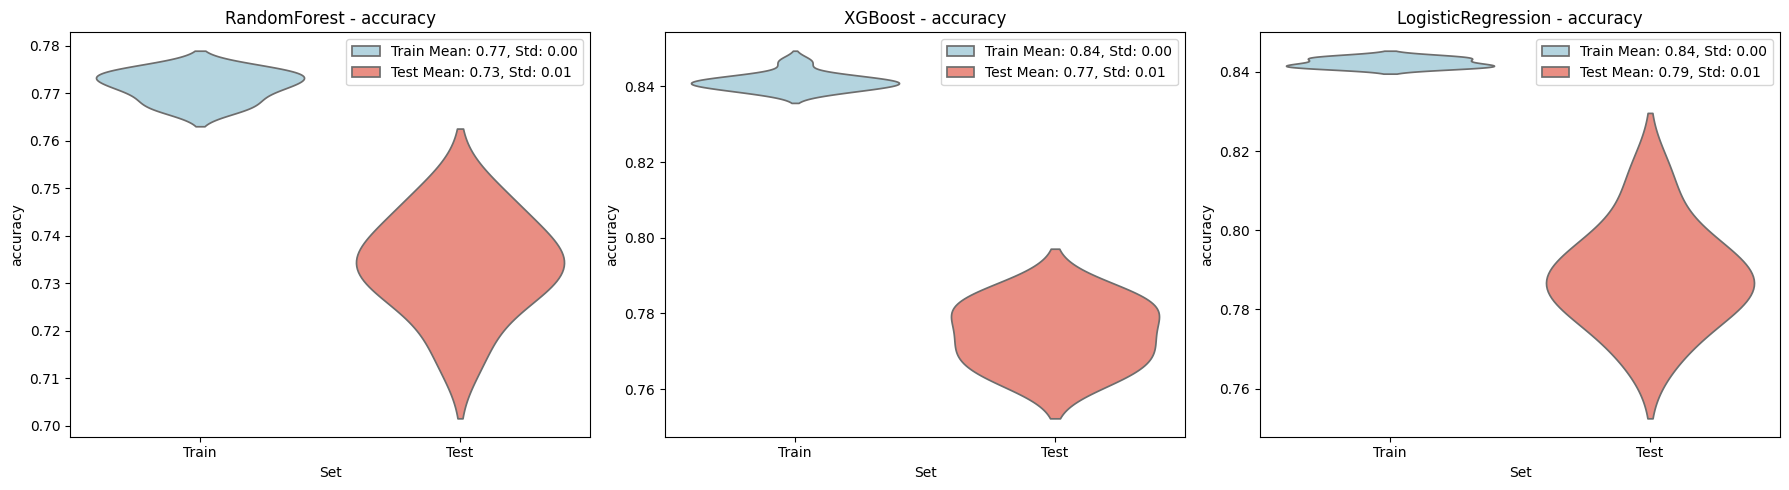

In [4]:
# Visualize results

path_file = 'Results/results_imbalanced_SMOTE.json'

evaluation_pipeline.results_viz(['accuracy'], imbalance_method='SMOTE', path_results= path_file)

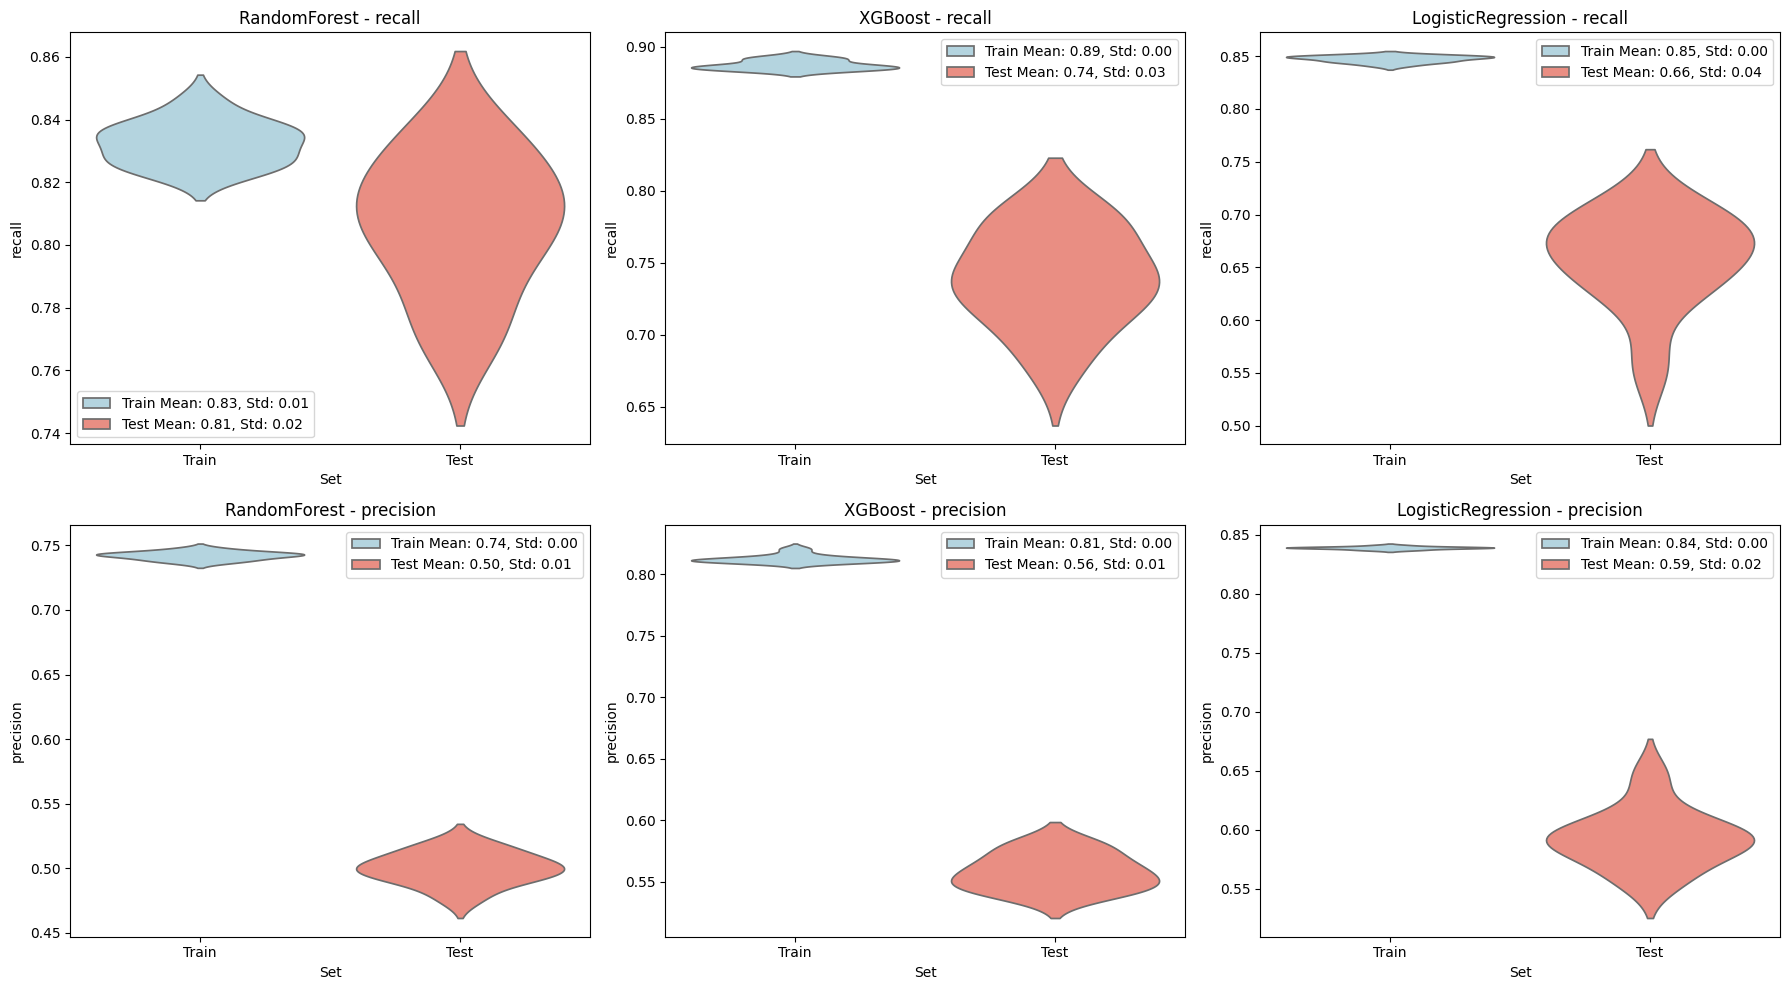

In [5]:
# Visualize results - Recall and Precision

evaluation_pipeline.results_viz(['recall', 'precision'], imbalance_method='SMOTE', path_results= path_file)

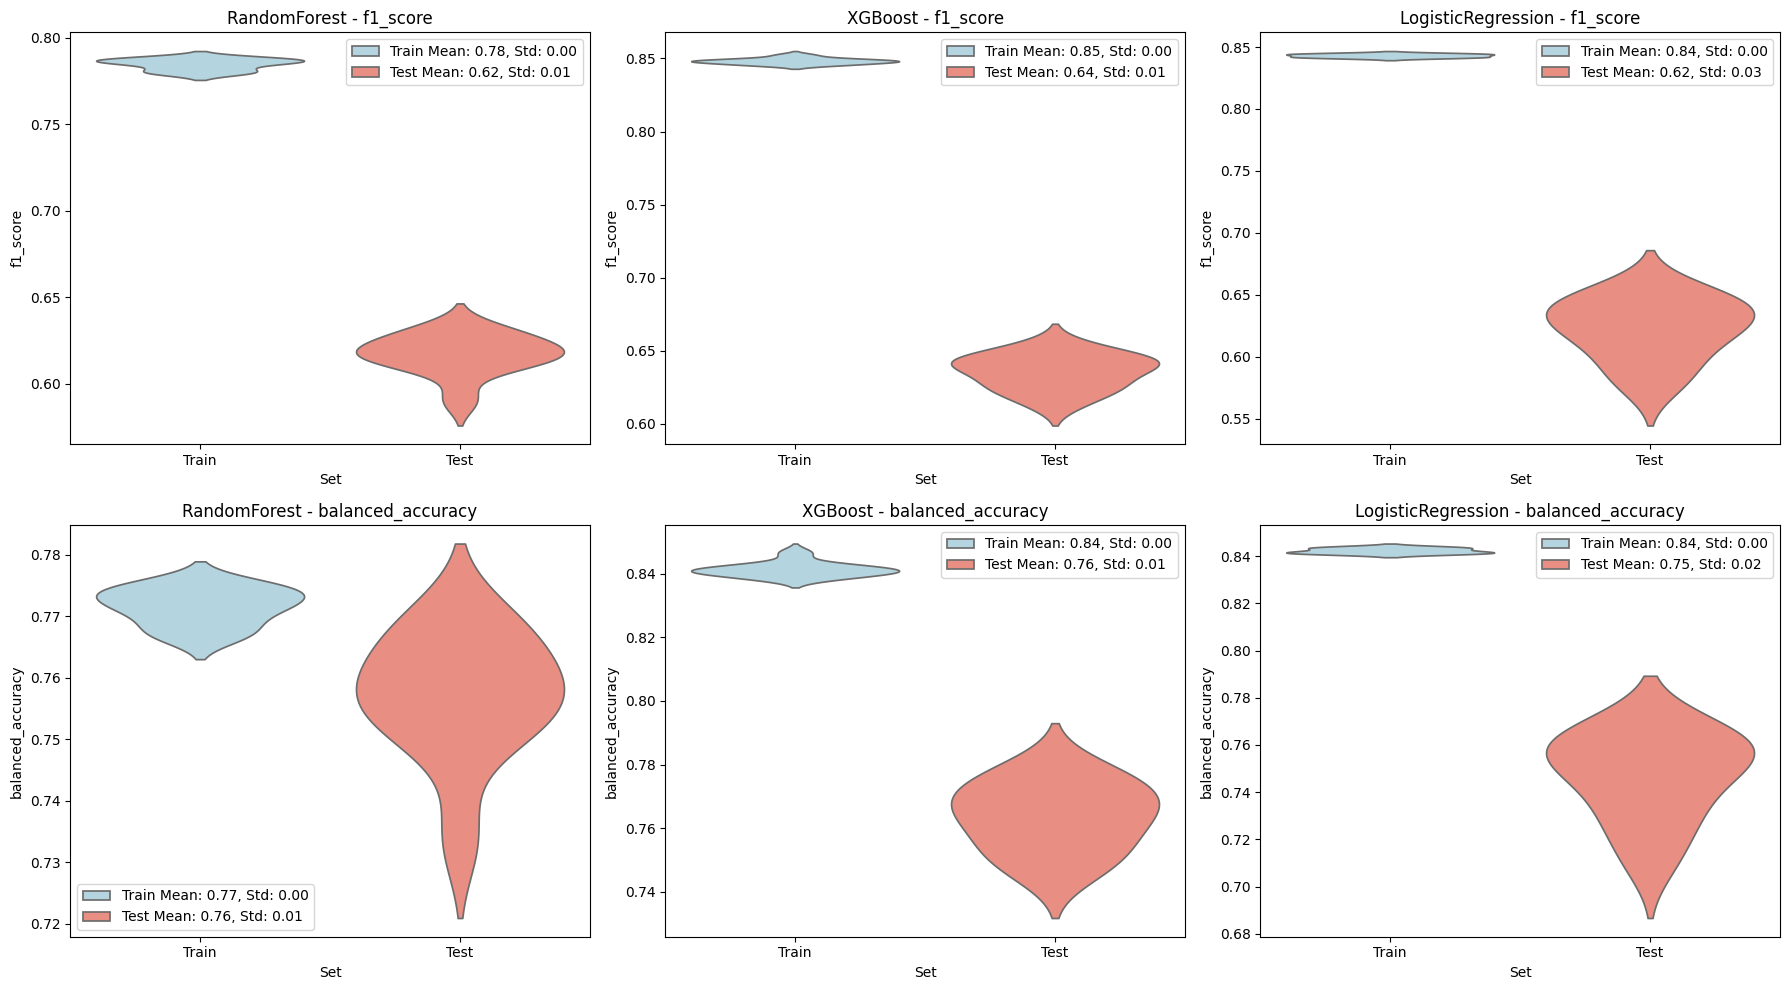

In [6]:
# Visualize results - f1 score and balanced accuracy

evaluation_pipeline.results_viz(['f1_score', 'balanced_accuracy'], imbalance_method='SMOTE', path_results= path_file)